# Imports

In [1]:
import maurikitlearn as mkl
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Data

In [2]:
#Embaralha dados
dados = np.loadtxt("trab4.data", delimiter=",")

#Embaralhando as amostras
np.random.shuffle(dados)

#Separa dados
X = dados[:,0:4]
y = dados[:,4]

#Normalização
X = (X - X.min()) / (X.max() - X.min())

# KMeans

In [3]:
KMeans = mkl.KMeans()

In [4]:
def relatorio(k_relatorio):
    means = np.array([])
    for i in range(0,20):
        means = np.append(means, KMeans.fit(X, k=k_relatorio, dimensoes=4).mean_distance)
    
    plt.plot(range(0,20), means)
    plt.xlabel("Execução")
    plt.ylabel("Média")
    plt.axis((0,1,0,1))
    plt.show()

    print("Média das médias: ", np.mean(means))

## K = 2

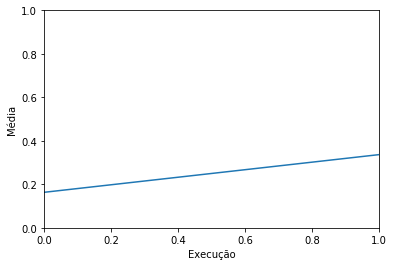

Média das médias:  0.2584561150702667


In [5]:
relatorio(2)

## K = 3

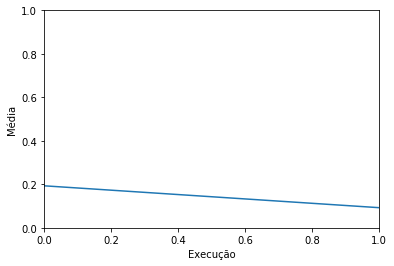

Média das médias:  0.18261359344870626


In [6]:
relatorio(3)

## K = 4

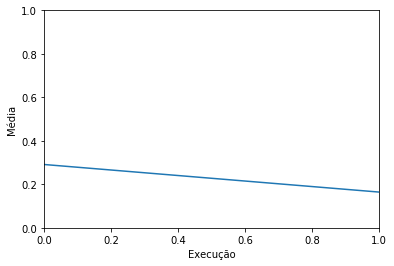

Média das médias:  0.1529905937182667


In [7]:
relatorio(4)

## K = 5

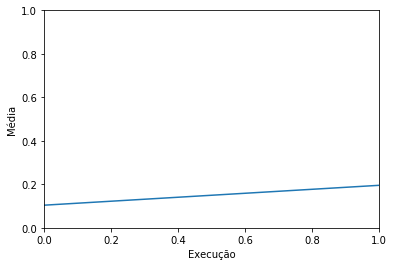

Média das médias:  0.12904534207669544


In [8]:
relatorio(5)

Observação: como se é observado, nesse caso, com k = 5 temos a menor média das distâncias. Isso não quer dizer necessariamente que seja o k ideal a ser usado.

# PCA 

In [9]:
pca = mkl.PCA(k=2)

In [10]:
X = dados[:,0:4]

In [11]:
pca.fit(X, normalize=False)

array([[ 0.73455716, -0.2478496 ],
       [-0.12286134,  0.0649007 ],
       [ 0.13618763, -0.8461696 ],
       [-0.65328692, -0.46728522]])

In [12]:
new_X = pca.transform(X)

In [13]:
for v in range(0,pca.variancias.shape[0]):
    print("Variância Preservada de PC", v, ": ", pca.variancias[v])

Variância Preservada de PC 0 :  0.719535343677519
Variância Preservada de PC 1 :  0.26507081542941097


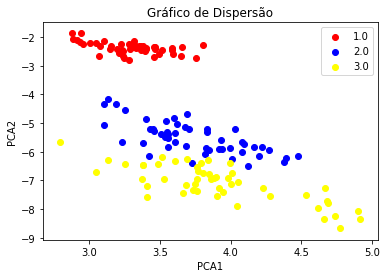

In [15]:
cores = {1: 'red', 2: 'blue', 3: 'yellow'}
for classe in np.unique(y):
    indexes = np.where(y == classe)
    plt.scatter(new_X[indexes, 0], new_X[indexes, 1], c=cores[classe], label=classe)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.title('Gráfico de Dispersão')
plt.show()